# Deep Learning on MNIST

[Resource](https://numpy.org/numpy-tutorials/content/tutorial-deep-learning-on-mnist.html)

This tutorial demonstrates how to build a simple **feedforward neural network** (with one hidden layer) and train it from scratch with NumPy to recognize handwritten digit images.

# Before We Begin

Feedforward refers to recognition-inference architecture of neural networks. As you already know, artificial neural networks architectures are based on inputs multiplied by weights to obtain outputs.

On the other hand, recurrent neural networks, or neural networks with loops, allow information from later processing stages to feed back to earlier stages for sequence processing. However, at every stage of inference a feedforward multiplication remains the core, essential for backpropagation.

Thus, neural networks cannot contain feedback like negative feedback or positive feedback where the outputs feed back to the very same inputs and modify them, as this will form an infinite loop.

Essentially, it's not possible to rewind in time to generate an error signal through backpropagation.

# Continuing with the lesson

Your deep learning model - one of the most basic artificial neural networks that resembles the original multi-layer perceptron - will learn to classify digits from 0 to 9 from the MNIST dataset.

The dataset contains 60,000 training and 10,000 test images and corresponding labels. Each training and test image is of size 784 (or 28x28 pixels) - this will be your input for the neural network.

Based on the image inputs and their labels (supervised learning), your neural network will be trained to learn their features using forward propagation and backpropagation (reverse-mode differentiation). The final output of the network is a vector of 10 scores - one for each handwritten digit image. You will also be evaluate how good your model is at classifying the images on the test set.

# Load the MNIST Dataset

In this section, you will download the zipped MNIST dataset files. Then, you will transform them into 4 files of NumPy array type using built-in Python modules. Finally, you will split the arrays into training and test sets.

1) Define a variable to store the training/test image/label names of the MNIST dataset in the list:

In [170]:
data_sources = {
    "training_images": "train-images-idx3-ubyte.gz",  # 60,000 training images.
    "test_images": "t10k-images-idx3-ubyte.gz",  # 10,000 test images.
    "training_labels": "train-labels-idx1-ubyte.gz",  # 60,000 training labels.
    "test_labels": "t10k-labels-idx1-ubyte.gz",  # 10,000 test labels.
}

2) Load the data. First check if the data is stored locally; if not, then download it.

In [171]:
import requests
import os

data_dir = "data"
os.makedirs(data_dir, exist_ok=True)

base_url = "https://ossci-datasets.s3.amazonaws.com/mnist/"

for fname in data_sources.values():
    fpath = os.path.join(data_dir, fname)
    if not os.path.exists(fpath):
        print("Downloading file: " + fname)
        resp = requests.get(base_url + fname, stream=True)
        resp.raise_for_status()
        with open(fpath, "wb") as fh:
            for chunk in resp.iter_content(chunk_size=128):
                fh.write(chunk)

3) Decompress the 4 files and create 4 `ndarrays`, saving them into a dictionary. Each original image is of size 28x28 and neural networks normally expect a 1D vector input; therefore, you also need to reshape the images by multiplying 28 by 28 (784).

In [172]:
import gzip
import numpy as np

mnist_dataset = {}

# Images
for key in ("training_images", "test_images"):
    with gzip.open(os.path.join(data_dir, data_sources[key]), "rb") as mnist_file:
        mnist_dataset[key] = np.frombuffer(
            mnist_file.read(), np.uint8, offset=16
        ).reshape(-1, 28 * 28)
# Labels
for key in ("training_labels", "test_labels"):
    with gzip.open(os.path.join(data_dir, data_sources[key]), "rb") as mnist_file:
        mnist_dataset[key] = np.frombuffer(mnist_file.read(), np.uint8, offset=8)

4) Split the data into training and test sets using the standard notation of `x` for data and `y` for labels, calling the training and test set images `x_train` and `x_test`, and the labels `y_train` and `y_test`:

In [173]:
x_train, y_train, x_test, y_test = (
    mnist_dataset["training_images"],
    mnist_dataset["training_labels"],
    mnist_dataset["test_images"],
    mnist_dataset["test_labels"],
)

5) You can confirm that the shape of the image array is `(60000, 784)` and `(10000, 784)` for training and test sets, respectively, and the labels - `(60000,)` and `(10000, )`:

In [174]:
print(
    f"The shape of training images: {x_train.shape} and training labels: {y_train.shape}"
    )

print(
    f"The shape of test images: {x_test.shape} and test labels: {y_test.shape}"
)

The shape of training images: (60000, 784) and training labels: (60000,)
The shape of test images: (10000, 784) and test labels: (10000,)


6) And you can inspect some images using Matplotlib:

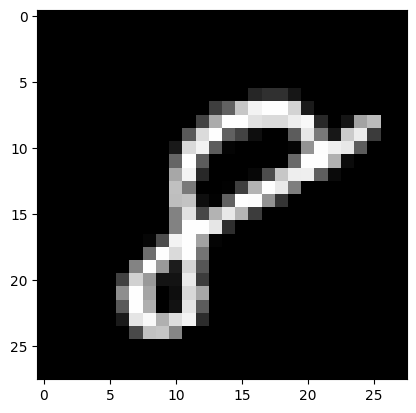

In [175]:
import matplotlib.pyplot as plt

# Take the 60,000th image (indexed at 59,999) from the training set,
# reshape from (784, ) to (28, 28) to have a valid shape for displaying purposes.
mnist_image = x_train[59999, :].reshape(28, 28)
# Set the color mapping to grayscale to have a black background.
plt.imshow(mnist_image, cmap="gray")
# Display the image.
plt.show()

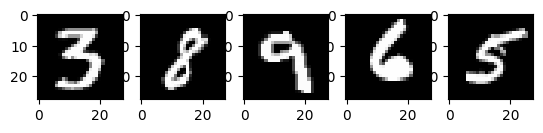

In [176]:
# Display 5 random images from the training set
num_examples = 5
seed = 147197952744
rng = np.random.default_rng(seed)

fig, axes = plt.subplots(1, num_examples)
for sample, ax in zip(rng.choice(x_train, size=num_examples, replace=False), axes):
    ax.imshow(sample.reshape(28, 28), cmap="gray")

Above are five 3images from the MNIST training set. Various hand-drawn Arabic numerals are shows, with exact values chosen randomly with each run of the code.

**Note:** You can also visualize a sample image as an array by printing `x_train[59999]`. Here, `59999` is your 60,000th training image sample. Your output will be quite long and should contain an array of 8-bit integers:

In [177]:
x_train[59999]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [178]:
# Display the label of the 60,000th image from the training set
y_train[59999]

np.uint8(8)

# Preprocess the Data

Neural networks can work with inputs that are in a form of tensors (multidimensional arrays) of floating-point type. When preprocessing the data, you should consider the following processes: vectorization and conversion to a floating-point format.

**Vectorization** is simple converting a matrix into one vector.

Since the MNIST data is already vectorized and the arrays are of `dtype` `uint8`, your next challenge is to convert them to a floating-point format, such as `float64` (double-precision):

- Normalizing the image data: a feature scaling procedure that can speed up the neural network training process by standardizing the distribution of your input data.
- One-hot/categorical encoding of the image labels.

In practice, you can use different types of floating-point precision depending on your goals and you can find more information about that in the [Nvidia](https://blogs.nvidia.com/blog/2019/11/15/whats-the-difference-between-single-double-multi-and-mixed-precision-computing/) and [Google Cloud](https://cloud.google.com/blog/products/ai-machine-learning/bfloat16-the-secret-to-high-performance-on-cloud-tpus) blog posts.

## Convert the image data to the floating-point format

The images data contain 8-bit integers encoded in the [0, 255] interval with color values between 0 and 255.

You will normalize them into floating-point arrays in the [0, 1] interval by dividing them by 255.

1) Check that the vectorized image data has type `uint8`:

In [179]:
print("The data type of training images: {}".format(x_train.dtype))
print("The data type of test images: {}".format(x_test.dtype))

The data type of training images: uint8
The data type of test images: uint8


2) Normalize the arrays by dividing them by 255 (and thus promoting the data type from `uint8` to `float64`) and then assign the train and test image data variables - `x_train` and `x_test` - to `training_images` and `train_labels`, respectively. To reduce the model training and evaluation time in this example, only a subset of the training and test images will be used. Both `training_images` and `test_images` will contain only 1,000 samples each out of the complete datasets of 60,000 and 10,000 images, respectively. These values can be controlled by changing the `training_sample` and `test_sample` below, up to their maximum values of 60,000 and 10,000.

In [180]:
training_sample, test_sample = 1000, 1000
training_images = x_train[0:training_sample] / 255
test_images = x_test[0:test_sample] / 255

You can also do it this way for a more elegant solution:

In [181]:
training_sample, test_sample = 1000, 1000
training_images = x_train[0:training_sample] / x_train.max()
test_images = x_test[0:test_sample] / x_test.max()

3) Confirm that the image data has changed to the floating-point format:

In [182]:
print("The data type of training images: {}".format(training_images.dtype))
print("The data type of test images: {}".format(test_images.dtype))

The data type of training images: float64
The data type of test images: float64


**Note:** You can also check that normalization was successful by printing `training_images[0]`. Your output should contain an array of floating-point numbers:

In [183]:
print(training_images[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

## Convert the labels to floating point through categorical/one-hot encoding

You will use one-hot encoding to embed each digit label as an all-zero vector with `np.zeros()` and place `1` for a label index. As a result, your label data will be arrays with `1.0` (or `1.`) in the position of each image label.

Since there are 10 labels (from 0 to 9) in total, your arrays will look similar to this:

`array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])`

1) Confirm that the image label data are integers with `dtype` `uint8`:

In [184]:
print("The data type of training labels: {}".format(y_train.dtype))
print("The data type of test labels: {}".format(y_test.dtype))

The data type of training labels: uint8
The data type of test labels: uint8


2) Define a function that performs one-hot encoding on arrays:

In [185]:
def one_hot_encoding(labels, dimension=10):
    """Define a one-hot variable for an all-zero vector
    with 10 dimensions (number labels from 0 to 9)"""
    one_hot_labels = labels[..., None] == np.arange(dimension)[None]
    # Return one-hot encoded labels
    return one_hot_labels.astype(np.float64)

3) Encode the labels and assign the values to new variables:

In [186]:
training_labels = one_hot_encoding(y_train[:training_sample])
test_labels = one_hot_encoding(y_test[:test_sample])

4) Check that the data type has changed to floating point:

In [187]:
print("The data type of training labels: {}".format(training_labels.dtype))
print("The data type of test labels: {}".format(test_labels.dtype))

The data type of training labels: float64
The data type of test labels: float64


5) Examine a few encoded labels:

In [188]:
print(training_labels[0])
print(training_labels[1])
print(training_labels[2])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


... and compare to the originals:

In [189]:
5
0
4

4

Dataset preparation is complete.

# Build and Train a Small Neural Network from Scratch

In this section you will familiarize yourself with some hig-level concepts of the basic building blocks of a deep learning mode.

Afterwards, you will construct the building blocks of a simple deep learning model in Python and NumPy and train it to learn to identify handwritten digits from the MNIST dataset with a certain level of accuracy.

## Neural network building blocks with NumPy

- *Layers:* These building blocks work as data filters - they process data and learn representations from inputs to better predict the target outputs.

You will use 1 hidden layer in your model to pass the inputs forward (forward propagation) and propagate the gradients/error derivatives of a loss function backward (backpropagation). These are input, hidden, and output layers.

In the hidden (middle) and output (last) layers, the neural network model will compute the weighted sum of inputs. To compute this process, you will use NumPy's matrix multiplication function `np.dot(layer, weights)`.

**Note:** For simplicity, the bias term is omitted in this example (there is no `np.dot(layer, weights) + bias`).

- *Weights:* These are important adjustable parameters that the neural network fine-tunes by forward and backward propagating the data. They are optimized through a process called gradient descent. Before the model training starts, the weights are randomly initialized with NumPy's `Generator.random()`.

The optimal weights should produce the highest prediction accuracy and the lowest error on the training and test sets.

- *Activation function:* Deep learning models are capable of determining non-linear relationships between inputs and outputs and these non-linear functions are usually applied to the output of each layer.

You will use a rectified linear unit (ReLU) to the hidden layer's output (for example, `relu(np.dot(layer, weights))`).

**Rectified Linear Unit (ReLLU)** is an activation function defined as the non-negative part of its argument. All it does is convert negative numbers to 0 and leave the rest the same.

- *Regularization:* This technique helps prevent the neural network model from overfitting. In this example, you will use a method called dropout - dilution - that randomly sets a number of features in a layer to 0s. You will define it with NumPy's `Generator.integers()` method and apply it to the hidden layer of the network.

- *Loss Function:* The computation determines the quality of predictions by comparing the image labels (the truth) with the predicted values in the final layer's output.

For simplicity, you will use a basic total squared error using NumPy's `np.sum()` function (for example, `np.sum((final_layer_output - image_labels) ** 2)`).

- *Accuracy:* This metric measures the accuracy of the network's ability to predict on the data it hasn't seen.

## Model architecture and training summary

- The *input* layer:

It is the input for the network — the previously preprocessed data that is loaded from `training_images` into `layer_0`.

- The *hidden* (middle) layer:

`layer_1` takes the output from the previous layer and performs matrix-multiplication of the input by weights (`weights_1`) with NumPy’s `np.dot()`.

Then, this output is passed through the ReLU activation function for non-linearity and then dropout is applied to help with overfitting.

- The *output* (last) layer:

`layer_2` ingests the output from layer_1 and repeats the same “dot multiply” process with `weights_2`.

The final output returns 10 scores for each of the 0-9 digit labels. The network model ends with a size 10 layer — a 10-dimensional vector.

- *Forward propagation, backpropagation, training loop*:

In the beginning of model training, your network randomly initializes the weights and feeds the input data forward through the hidden and output layers. This process is the forward pass or forward propagation.

Then, the network propagates the “signal” from the loss function back through the hidden layer and adjusts the weights values with the help of the learning rate parameter (more on that later).

**Note:** In more technical terms, you:

1) Measure the error by comparing the real label of an image (the truth) with the prediction of the model.

2) Differentiate the loss function.

3) Ingest the gradients with the respect to the output, and backpropagate them with the respect to the inputs through the layer(s).

Since the network contains tensor operations and weight matrices, backpropagation uses the chain rule.

With each iteration (epoch) of the neural network training, this forward and backward propagation cycle adjusts the weights, which is reflected in the accuracy and error metrics. As you train the model, your goal is to minimize the error and maximize the accuracy on the training data, where the model learns from, as well as the test data, where you evaluate the model.

## Compose the model and begin training and testing it

Having covered the main deep learning concepts and the neural etwork architecture, let's write the code.

1) We'll start by creating a new random number generator, providing a seed for reproducibility:

In [190]:
seed = 884736743
rng = np.random.default_rng(seed)

2) For the hidden layer, define the ReLU activation function for forward propagation and ReLU's derivative that will be used during backpropagation:

In [191]:
def relu(x):
    return (x >= 0) * x

# Set up a derivative of the ReLU function that returns 1 for a positive input and 0 otherwise
def relu2deriv(output):
    return output >= 0

3) Set certain defaults of hyperparameters, such as:

- *Learning rate:* `learning_rate` - helps limit the magnitude of weight updates to prevent them from overcorrecting.

A **hyperparameter** is a parameter that can be set in order to define any configurable part of a model's learning process.

- *Epochs* (iterations): `epochs` - the number of complete passes - forward and backward propagations - of the data through the network. This parameter can positively or negatively affect the results. The higher the iterations, the longer the learning process may take. Because this is a computationally intensive task, we have chosen a very low number of epochs (20). To get meaningful results, you should choose a much larger number.

- *Size of the hidden layer in a network:* `hidden_size` - different sizes of the hidden layer can affect the results during training and testing.

- *Size of the input:* `pixels_per_image` - you have established that the image input is 784 (28x28) (in pixels).

- *Number of labels:* `num_labels` - indicates the output number for the output layer where the predictions occur for 10 (0 to 9) handwritten digit labels.

In [192]:
learning_rate = 0.005
epochs = 100
hidden_size = 100
pixels_per_image = 784
num_labels = 10

4) Initialize the weight vectors that will be used in the hidden and output layers with random values:

In [193]:
weights_1 = 0.2 * rng.random((pixels_per_image, hidden_size)) - 0.1
weights_2 = 0.2 * rng.random((hidden_size, num_labels)) - 0.1

5) Set up the neural network's learning experiment with a training loop and start the training process. Note that the model is evaluated against the test set at each epoch to track its performance over the training epochs.

Start the training process:

In [194]:
# To store training and test set losses and accurate predictions
# for visualization.
store_training_loss = []
store_training_accurate_pred = []
store_test_loss = []
store_test_accurate_pred = []

# This is a training loop.
# Run the learning experiment for a defined number of epochs (iterations).
for j in range(epochs):

    #################
    # Training step #
    #################

    # Set the initial loss/error and the number of accurate predictions to zero.
    training_loss = 0.0
    training_accurate_predictions = 0

    # For all images in the training set, perform a forward pass
    # and backpropagation and adjust the weights accordingly.
    for i in range(len(training_images)):
        # Forward propagation/forward pass:
        # 1. The input layer:
        #    Initialize the training image data as inputs.
        layer_0 = training_images[i]
        # 2. The hidden layer:
        #    Take in the training image data into the middle layer by
        #    matrix-multiplying it by randomly initialized weights.
        layer_1 = np.dot(layer_0, weights_1)
        # 3. Pass the hidden layer's output through the ReLU activation function.
        layer_1 = relu(layer_1)
        # 4. Define the dropout function for regularization.
        dropout_mask = rng.integers(low=0, high=2, size=layer_1.shape)
        # 5. Apply dropout to the hidden layer's output.
        layer_1 *= dropout_mask * 2
        # 6. The output layer:
        #    Ingest the output of the middle layer into the the final layer
        #    by matrix-multiplying it by randomly initialized weights.
        #    Produce a 10-dimension vector with 10 scores.
        layer_2 = np.dot(layer_1, weights_2)

        # Backpropagation/backward pass:
        # 1. Measure the training error (loss function) between the actual
        #    image labels (the truth) and the prediction by the model.
        training_loss += np.sum((training_labels[i] - layer_2) ** 2)
        # 2. Increment the accurate prediction count.
        training_accurate_predictions += int(
            np.argmax(layer_2) == np.argmax(training_labels[i])
        )
        # 3. Differentiate the loss function/error.
        layer_2_delta = training_labels[i] - layer_2
        # 4. Propagate the gradients of the loss function back through the hidden layer.
        layer_1_delta = np.dot(weights_2, layer_2_delta) * relu2deriv(layer_1)
        # 5. Apply the dropout to the gradients.
        layer_1_delta *= dropout_mask
        # 6. Update the weights for the middle and input layers
        #    by multiplying them by the learning rate and the gradients.
        weights_1 += learning_rate * np.outer(layer_0, layer_1_delta)
        weights_2 += learning_rate * np.outer(layer_1, layer_2_delta)

    # Store training set losses and accurate predictions.
    store_training_loss.append(training_loss)
    store_training_accurate_pred.append(training_accurate_predictions)

    ###################
    # Evaluation step #
    ###################

    # Evaluate model performance on the test set at each epoch.

    # Unlike the training step, the weights are not modified for each image
    # (or batch). Therefore the model can be applied to the test images in a
    # vectorized manner, eliminating the need to loop over each image
    # individually:

    results = relu(test_images @ weights_1) @ weights_2

    # Measure the error between the actual label (truth) and prediction values.
    test_loss = np.sum((test_labels - results) ** 2)

    # Measure prediction accuracy on test set
    test_accurate_predictions = np.sum(
        np.argmax(results, axis=1) == np.argmax(test_labels, axis=1)
    )

    # Store test set losses and accurate predictions.
    store_test_loss.append(test_loss)
    store_test_accurate_pred.append(test_accurate_predictions)

    # Summarize error and accuracy metrics at each epoch
    print(
        (
            f"Epoch: {j}\n"
            f"  Training set error: {training_loss / len(training_images):.3f}\n"
            f"  Training set accuracy: {training_accurate_predictions / len(training_images)}\n"
            f"  Test set error: {test_loss / len(test_images):.3f}\n"
            f"  Test set accuracy: {test_accurate_predictions / len(test_images)}"
        )
    )

Epoch: 0
  Training set error: 0.898
  Training set accuracy: 0.397
  Test set error: 0.680
  Test set accuracy: 0.582
Epoch: 1
  Training set error: 0.656
  Training set accuracy: 0.633
  Test set error: 0.607
  Test set accuracy: 0.641
Epoch: 2
  Training set error: 0.592
  Training set accuracy: 0.68
  Test set error: 0.569
  Test set accuracy: 0.679
Epoch: 3
  Training set error: 0.556
  Training set accuracy: 0.7
  Test set error: 0.541
  Test set accuracy: 0.708
Epoch: 4
  Training set error: 0.534
  Training set accuracy: 0.732
  Test set error: 0.526
  Test set accuracy: 0.729
Epoch: 5
  Training set error: 0.515
  Training set accuracy: 0.715
  Test set error: 0.500
  Test set accuracy: 0.739
Epoch: 6
  Training set error: 0.495
  Training set accuracy: 0.748
  Test set error: 0.487
  Test set accuracy: 0.753
Epoch: 7
  Training set error: 0.483
  Training set accuracy: 0.769
  Test set error: 0.486
  Test set accuracy: 0.747
Epoch: 8
  Training set error: 0.473
  Training set

After executing the cell above, you can visualize and test set errors and accuracy for an instance of this training process.

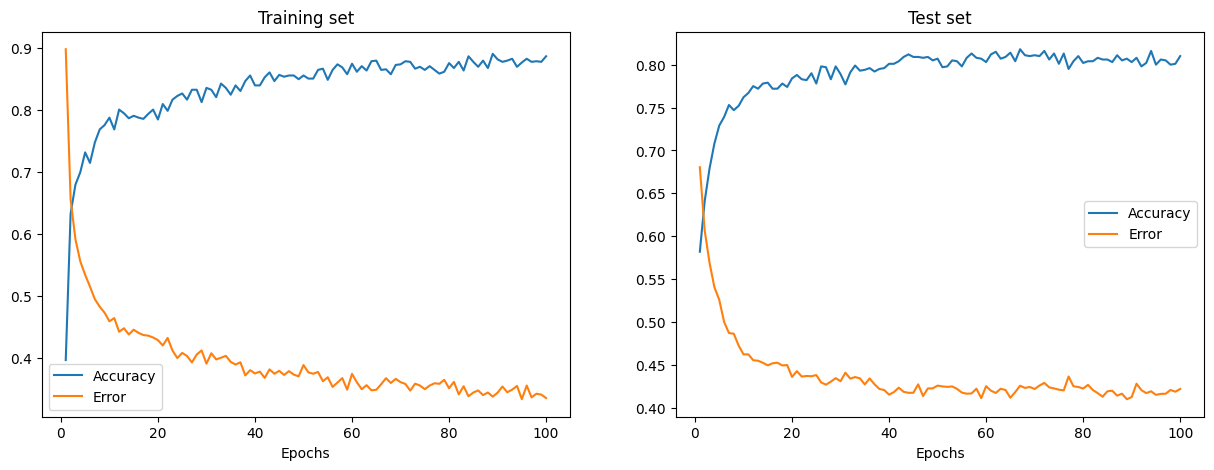

In [198]:
epoch_range = np.arange(epochs) + 1 # Starting from 1

# The training set metrics
training_metrics = {
    "accuracy": np.asarray(store_training_accurate_pred) / len(training_images),
    "error": np.asarray(store_training_loss) / len(training_images)
}

# The test set metrics
test_metrics = {
    "accuracy": np.asarray(store_test_accurate_pred) / len(test_images),
    "error": np.asarray(store_test_loss) / len(test_images),
}

# Display the plots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
for ax, metrics, title in zip(
    axes, (training_metrics, test_metrics), ("Training set", "Test set")
):
    for metric, values in metrics.items():
        ax.plot(epoch_range, values, label=metric.capitalize())
    ax.set_title(title)
    ax.set_xlabel("Epochs")
    ax.legend()
plt.show()

The training and testing error is shown above in the left and right plots, respectively. As the number of Epochs increases, the total error decreases and the accuracy increases.

The accuracy rates that your model reaches during training and testing may be somewhat plausible but you may also find the error rates to be quite high.

To reduce the error during training and testing, you can consider changing the simple loss function to, for example, categorical cross-entropy. Other possible solutions are discussed below.

# Next Steps

You have learned how to build and train a simple feed-forward neural network from scratch using just NumPy to classify handwritten MNIST digits.

To further enhance and optimize your neural network model, you can consider one of a mixture of the following:

- Increase the training sample size from 1,000 to a higher number (up to 60,000).
- Use mini-batches and reduce the learning rate.
- Alter the architecture by introducing more hidden layers to make the network deeper.
- Combine the cross-entropy loss function with a softmax activation function in the last layer.
- Introduce convolutional neural network architecture (likely not applicable to your future use cases with data analysis and LLM implementation).
- Use a higher epoch size to train longer and add more regularization techniques, such as early stopping, to prevent overfitting.
- Introduce a validation set for an unbiased valuation of the model fit.
- Apply batch normalization for faster and more stable training.
- Tune other parameters, such as the learning rate and hidden layer size.

Building a neural network from scratch with NumPy is a great way to learn more about NumPy and about deep learning. However, for real world applications you should use specialized frameworks - such as PyTorch, JAX, TensorFlow, or MXNet - that provide NumPy - like APIs, have built-in automatic differentiation and GPU support, and are designed for high performance numerical computing and machine learning.